**Лабораторная работа №2**

Разработка полностью связанной нейронной сети

**Цель:** получить базовые навыки работы с одной из библиотек глубокого обучения (Caffe, Torch, TensorFlow или MXNet на выбор) на примере полностью связанных нейронных сетей.

**Задачи:**

Выполнение практической работы предполагает решение следующих задач:
1. выбор библиотеки для выполнения практических работ курса;
2. установка выбранной библиотеки на кластере;
3. проверка корректности установки библиотеки, разработка и запуск
тестового примера сети, соответствующей логистической регрессии, для решения задачи классификации рукописных цифр набора данных MNIST;
4. выбор практической задачи компьютерного зрения для выполнения
практических работ;
5. разработка программ/скриптов для подготовки тренировочных и
тестовых данных в формате, который обрабатывается выбранной
библиотекой;
6. разработка нескольких архитектур полностью связанных нейронных
сетей (варьируются количество слоев и виды функций активации на каждом слое) в формате, который принимается выбранной библиотекой;
7. обучение разработанных глубоких моделей;
8. тестирование обученных глубоких моделей; сделать вывод относительно разработанных архитектур;
10. подготовка отчета, содержащего минимальный объем информации
по каждому этапу выполнения работы.


**1. Выбор библиотеки для выполнения практических работ**

Мною выбрана библиотека TensorFlow (с Keras как высокоуровневым API) так как это  популярная библиотека для глубокого обучения с широкой документацией и поддержкой, Keras упрощает создание и обучение нейронных сетей, поддерживает как CPU, так и GPU, что подходит для работы на кластере.

**2. Загрузка необходимых библиотек**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from PIL import Image
import random
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go
import plotly.offline as pyo
import gc

# Библиотека TensorFlow
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.data import Dataset
import tensorflow.keras.preprocessing.image as tf_image

In [ ]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

**3. Проверка на данных mnist**

Количество обучающих изображений: 60000
Количество тестовых изображений: 10000


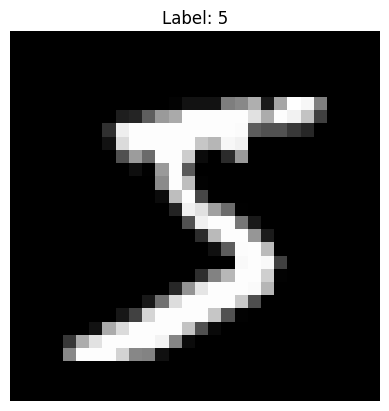

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7020 - loss: 1.0066 - val_accuracy: 0.8870 - val_loss: 0.4171
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8831 - loss: 0.4242 - val_accuracy: 0.9001 - val_loss: 0.3601
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8940 - loss: 0.3744 - val_accuracy: 0.9062 - val_loss: 0.3370
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8997 - loss: 0.3514 - val_accuracy: 0.9092 - val_loss: 0.3237
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9033 - loss: 0.3373 - val_accuracy: 0.9122 - val_loss: 0.3149


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8973 - loss: 0.3604
Accuracy на тестовой выборке: 91.14%


In [ ]:
# Функция для построения графика потерь и точности
def grafic(train_losses, val_losses, val_accuracies):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(1, len(train_losses) + 1)), y=train_losses,
                             mode='lines+markers', name='Training Loss'))
    fig.add_trace(go.Scatter(x=list(range(1, len(val_losses) + 1)), y=val_losses,
                             mode='lines+markers', name='Validation Loss'))
    fig.add_trace(go.Scatter(x=list(range(1, len(val_accuracies) + 1)), y=val_accuracies,
                             mode='lines+markers', name='Validation Accuracy', yaxis='y2'))

    fig.update_layout(title='Training and Validation Loss/Accuracy',
                      xaxis_title='Epochs',
                      yaxis_title='Loss',
                      yaxis2=dict(title='Accuracy (%)', overlaying='y', side='right'),
                      template='plotly_white')

    pyo.iplot(fig)

# Загрузка данных MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Нормализация данных (аналог transforms.Normalize((0.5,), (0.5,)))
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = (x_train - 0.5) / 0.5
x_test = (x_test - 0.5) / 0.5

# Преобразование изображений в одномерный массив
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Проверка данных
print(f'Количество обучающих изображений: {len(x_train)}')
print(f'Количество тестовых изображений: {len(x_test)}')

# Визуализация одного изображения
image = x_train[0].reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.axis('off')
plt.show()

# Создание модели
model = models.Sequential([
    layers.Input(shape=(784,)),  # 28x28 = 784
    layers.Dense(10, activation='softmax')  # Выходной слой для 10 классов
])

# Компиляция модели
model.compile(optimizer='sgd',  # SGD с lr=0.01 по умолчанию
              loss='sparse_categorical_crossentropy',  # Аналог CrossEntropyLoss
              metrics=['accuracy'])

# Обучение модели
num_epochs = 5
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=64, validation_split=0.2)

# Сбор данных для графика
train_losses = history.history['loss']
val_losses = history.history['val_loss']
val_accuracies = [acc * 100 for acc in history.history['val_accuracy']]

# Построение графика
grafic(train_losses, val_losses, val_accuracies)

# Тестирование модели
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Accuracy на тестовой выборке: {test_acc * 100:.2f}%')

Количество обучающих изображений: 60000
Количество тестовых изображений: 10000


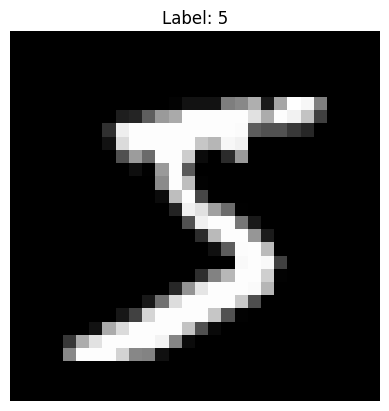

In [ ]:
# Проверим, что загрузилось
print(f'Количество обучающих изображений: {len(x_train)}')
print(f'Количество тестовых изображений: {len(x_test)}')

# Получение первого изображения и метки из обучающей выборки
image = x_train[0].reshape(28, 28)  # Преобразуем обратно в 2D-формат для отображения
label = y_train[0]

# Визуализация изображения
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()

In [ ]:
# Загрузка данных MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Нормализация данных и преобразование изображений в одномерный массив
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = (x_train - 0.5) / 0.5  # Нормализация к [-1, 1]
x_test = (x_test - 0.5) / 0.5
x_train = x_train.reshape(-1, 28 * 28)  # Преобразуем из (28, 28) в (784,)
x_test = x_test.reshape(-1, 28 * 28)

# Создание датасетов с батчами
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(buffer_size=60000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

# Создаем нейронную сеть
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(784,)),  # Входной слой: 28*28=784 пикселя
    tf.keras.layers.Dense(10, activation='softmax')  # Полносвязный слой с 10 выходами (классы 0-9)
])

# Компиляция модели
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  # SGD с lr=0.01
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели на 5 эпохах
num_epochs = 5
history = model.fit(train_dataset, epochs=num_epochs, verbose=1)

# Вывод потерь для каждой эпохи
for epoch in range(num_epochs):
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {history.history["loss"][epoch]:.4f}')

# Тестирование модели
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)
print(f'Accuracy на тестовой выборке: {test_accuracy * 100:.2f}%')

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7049 - loss: 1.0150
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8874 - loss: 0.4075
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8994 - loss: 0.3534
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9015 - loss: 0.3409
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9082 - loss: 0.3235
Epoch [1/5], Loss: 0.6554
Epoch [2/5], Loss: 0.3943
Epoch [3/5], Loss: 0.3579
Epoch [4/5], Loss: 0.3387
Epoch [5/5], Loss: 0.3270
Accuracy на тестовой выборке: 91.38%


Точность модели выше 90% - это хороший результат.

Был использовано подмножество набора данных Food-101. (Bossard, Lukas, Matthieu Guillaumin и Luc Van Gool. "Food-101 – Mining Discriminative Components with Random Forests") https://www.kaggle.com/datasets/carlosrunner/pizza-not-pizza Изображения находятся в папке "img" в двух папках, "pizza" и "not_pizza", в каждой папке 983 файла с изображениями.

**4 Подготовка данных**

Количество изображений в папке pizza: 983


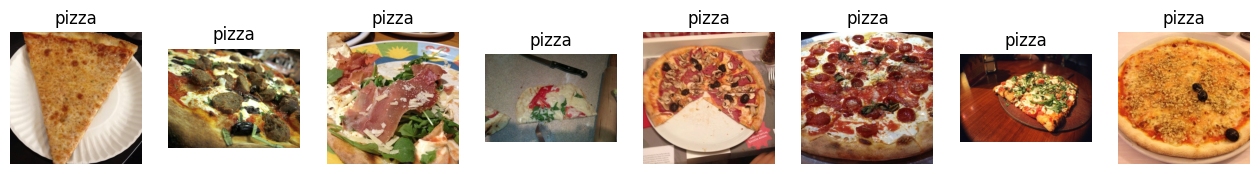

Количество изображений в папке not_pizza: 983


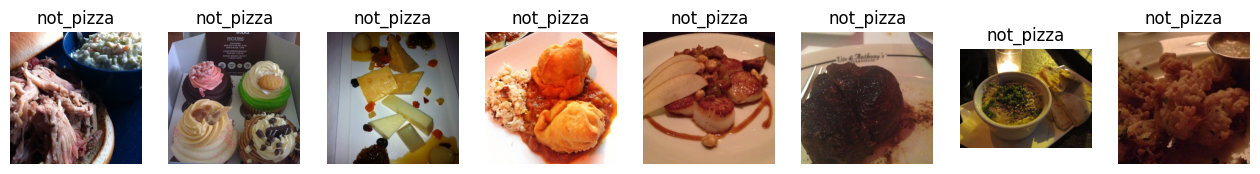

In [ ]:
def display_sample_images(category_name, sample_size=8):
    root_dir = "/content/drive/MyDrive/Лабораторная_работа_2/img/"
    category_path = os.path.join(root_dir, category_name)

    # Проверяем, существует ли путь
    if not os.path.exists(category_path):
        print(f"Папка {category_path} не найдена. Проверьте путь.")
        return

    # Получаем список файлов и выбираем случайные изображения
    img_files = os.listdir(category_path)
    if len(img_files) < sample_size:
        print(f"В папке {category_path} недостаточно изображений для выборки {sample_size}. Доступно: {len(img_files)}")
        sample_size = len(img_files)

    # Выбираем случайные изображения
    imgs = random.sample(img_files, sample_size)
    img_paths = [os.path.join(category_path, img) for img in imgs]
    print(f'Количество изображений в папке {category_name}: {len(img_files)}')

    # Визуализация изображений
    plt.figure(figsize=(16, 4))
    for k in range(sample_size):
        plt.subplot(1, sample_size, k+1)
        try:
            img = Image.open(img_paths[k]).convert("RGB")  # Открываем изображение и преобразуем в RGB
            plt.imshow(img)
            plt.title(category_name)
            plt.axis("off")
        except Exception as e:
            print(f"Ошибка при загрузке изображения {img_paths[k]}: {e}")
    plt.show()

# Вызов функции для отображения изображений из категорий
display_sample_images("pizza")
display_sample_images("not_pizza")

In [ ]:
# Путь к данным
data_dir = '/content/drive/MyDrive/Лабораторная_работа_2/img/'

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(512, 512),
    batch_size=None,
    shuffle=False,
    label_mode='int'
)
# Получаем количество изображений
total_size = dataset.cardinality().numpy()
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

print(f'Количество обучающих изображений: {train_size}')
print(f'Количество валидационных изображений: {val_size}')
print(f'Количество тестовых изображений: {test_size}')

# Разделение на train, val и test
train_dataset = dataset.take(train_size)
remaining = dataset.skip(train_size)
val_dataset = remaining.take(val_size)
test_dataset = remaining.skip(val_size)

# Функция для нормализации изображений
def normalize_image(image, label):
    image = image / 255.0  # Приведение значений пикселей к [0, 1]
    # Нормализация с заданными mean и std
    mean = tf.constant([0.485, 0.456, 0.406])
    std = tf.constant([0.229, 0.224, 0.225])
    image = (image - mean) / std
    return image, label

# Применение нормализации к датасетам
train_dataset = train_dataset.map(normalize_image)
val_dataset = val_dataset.map(normalize_image)
test_dataset = test_dataset.map(normalize_image)

# Создание загрузчиков
batch_size = 16
train_dataset = train_dataset.shuffle(buffer_size=train_size).batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

Found 2948 files belonging to 2 classes.
Количество обучающих изображений: 2063
Количество валидационных изображений: 442
Количество тестовых изображений: 443


**5. Разработка нейронных сетей и их обучение.**

Создадим три модели, с разным количеством слоев и функциями активации скрытых слоев. Общее в моделях то, что все они являются полносвязными, так как нам нужна бинарная классификация, активация последнего слоя - sigmoid:

1. простая модель. Один скрытый линейный слой, функция активации скрытого слоя - RELU;
2. средняя модель. Четыре скрытых слоя, функция активации скрытого слоя - тангенс;
3. сложная модель.Четыре скрытых слоя, используем нормализацию, обнуление нейронов и LeakyReLU в качестве активации.

In [ ]:
# Установим размер изображений
IMG_SIZE = 128  # Уменьшен для экономии памяти
batch_size = 4  # Небольшой batch_size для минимизации нагрузки на ОЗУ

# Путь к данным
data_dir = '/content/drive/MyDrive/Лабораторная_работа_2/img'

# Загрузка данных и диагностика
def load_datasets():
    print("Loading datasets...")
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        image_size=(IMG_SIZE, IMG_SIZE),
        batch_size=batch_size,
        shuffle=True,
        label_mode='binary'
    )

    # Проверка распределения классов
    class_counts = {0: 0, 1: 0}
    total_samples = 0
    for images, labels in dataset.unbatch():
        label = int(labels.numpy())
        class_counts[label] += 1
        total_samples += 1

    print(f"Total samples: {total_samples}")
    print(f"Class distribution: {class_counts}")
    print(f"Class 0 percentage: {class_counts[0]/total_samples*100:.2f}%")
    print(f"Class 1 percentage: {class_counts[1]/total_samples*100:.2f}%")

    # Разделение на train/val/test (70/15/15)
    total_size = dataset.cardinality().numpy()
    train_size = int(0.7 * total_size)
    val_size = int(0.15 * total_size)

    train_dataset = dataset.take(train_size)
    remaining = dataset.skip(train_size)
    val_dataset = remaining.take(val_size)
    test_dataset = remaining.skip(val_size)

    # Нормализация данных (обязательно для обучения)
    def normalize(image, label):
        return image / 255.0, label

    train_dataset = train_dataset.map(normalize).prefetch(tf.data.AUTOTUNE)
    val_dataset = val_dataset.map(normalize).prefetch(tf.data.AUTOTUNE)
    test_dataset = test_dataset.map(normalize).prefetch(tf.data.AUTOTUNE)

    return train_dataset, val_dataset, test_dataset

# Простая полносвязная модель с одним скрытым слоем и ReLU
def create_simple_nn():
    inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    # Разворачиваем изображение в одномерный вектор
    x = tf.keras.layers.Flatten()(inputs)
    # Один скрытый слой с активацией ReLU
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    # Выходной слой для бинарной классификации с sigmoid
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    return tf.keras.Model(inputs=inputs, outputs=x)

# Функция обучения
def train_model(model, train_dataset, val_dataset, num_epochs=10, learning_rate=0.001):
    print("Compiling model...")
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=['accuracy']
    )
    model.summary()

    print("Starting training...")
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=num_epochs,
        verbose=1
    )

    print("Training completed.")
    return history.history['loss'], history.history['val_loss'], history.history['val_accuracy']

# Загрузка данных
train_dataset, val_dataset, test_dataset = load_datasets()

# Создание и обучение модели
model = create_simple_nn()
train_losses, val_losses, val_accuracies = train_model(
    model, train_dataset, val_dataset, num_epochs=30, learning_rate=0.001
)

# Вывод результатов
print("Training Losses:", train_losses)
print("Validation Losses:", val_losses)
print("Validation Accuracies:", val_accuracies)

# Очистка памяти
tf.keras.backend.clear_session()
gc.collect()

Loading datasets...
Found 2948 files belonging to 2 classes.


<ipython-input-18-2302530133>:23: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Total samples: 2948
Class distribution: {0: 1965, 1: 983}
Class 0 percentage: 66.66%
Class 1 percentage: 33.34%
Compiling model...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,291,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,291,713 (24.00 MB)

 Trainable params: 6,291,713 (24.00 MB)

 Non-trainable params: 0 (0.00 B)

Starting training...
Epoch 1/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 65s 125ms/step - accuracy: 0.5799 - loss: 6.6817 - val_accuracy: 0.6682 - val_loss: 2.5202
Epoch 2/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 64s 124ms/step - accuracy: 0.6041 - loss: 1.5526 - val_accuracy: 0.5318 - val_loss: 0.9833
Epoch 3/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 75s 110ms/step - accuracy: 0.6103 - loss: 0.9155 - val_accuracy: 0.6818 - val_loss: 1.2969
Epoch 4/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 56s 108ms/step - accuracy: 0.6471 - loss: 0.6988 - val_accuracy: 0.6795 - val_loss: 1.0757
Epoch 5/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 90s 124ms/step - accuracy: 0.6604 - loss: 0.6408 - val_accuracy: 0.6750 - val_loss: 0.6362
Epoch 6/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 64s 125ms/step - accuracy: 0.6750 - loss: 0.6126 - val_accuracy: 0.6841 - val_loss: 0.6990
Epoch 7/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 54s 105ms/step - accuracy: 0.6754 - loss: 0.6062 - val_accuracy: 0.6773 - val_loss: 0.6373
Epoch 8/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 64s 124ms/step - accur

0

Функции, производящие обучение и тестирование на валидационной выборке:

Модель обучается, но ограничена:

Точность выше 50% (до 69.5%) говорит о том, что данные содержат закономерности, которые модель может частично уловить. Это исключает проблему полного дисбаланса классов или повреждённых данных.
Однако точность не превышает 70%, что может быть связано с недостаточной сложностью модели. Простая полносвязная сеть с одним скрытым слоем (128 нейронов) может быть слишком простой для задачи классификации изображений, где важны пространственные зависимости (например, текстуры, формы).
Отсутствие сильного переобучения:

Потери на обучении и валидации схожи (0.59 против 0.63-0.71), что указывает на отсутствие сильного переобучения. Это означает, что проблема не в избыточной сложности модели, а, скорее, в её недостаточной способности извлекать признаки из изображений.
Плато в обучении:

Снижение потерь замедляется после 20-й эпохи, и точность стабилизируется около 67-69%. Это может указывать на то, что текущая архитектура модели достигла своего предела или гиперпараметры (например, скорость обучения) не позволяют двигаться дальше.

**Функция обучения для второй модели**

In [ ]:
# Установим размер изображений
IMG_SIZE = 128  # Уменьшен для экономии памяти
batch_size = 4  # Небольшой batch_size для минимизации нагрузки на ОЗУ

# Путь к данным (замените на ваш)
data_dir = '/content/drive/MyDrive/Лабораторная_работа_2/img'

# Загрузка данных и диагностика
def load_datasets():
    print("Loading datasets...")
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        image_size=(IMG_SIZE, IMG_SIZE),
        batch_size=batch_size,
        shuffle=True,
        label_mode='binary'  # Бинарная классификация
    )

    # Проверка распределения классов
    class_counts = {0: 0, 1: 0}
    total_samples = 0
    for images, labels in dataset.unbatch():
        label = int(labels.numpy())
        class_counts[label] += 1
        total_samples += 1

    print(f"Total samples: {total_samples}")
    print(f"Class distribution: {class_counts}")
    print(f"Class 0 percentage: {class_counts[0]/total_samples*100:.2f}%")
    print(f"Class 1 percentage: {class_counts[1]/total_samples*100:.2f}%")

    # Разделение на train/val/test (70/15/15)
    total_size = dataset.cardinality().numpy()
    train_size = int(0.7 * total_size)
    val_size = int(0.15 * total_size)

    train_dataset = dataset.take(train_size)
    remaining = dataset.skip(train_size)
    val_dataset = remaining.take(val_size)
    test_dataset = remaining.skip(val_size)

    # Нормализация данных (обязательно для обучения)
    def normalize(image, label):
        return image / 255.0, label

    train_dataset = train_dataset.map(normalize).prefetch(tf.data.AUTOTUNE)
    val_dataset = val_dataset.map(normalize).prefetch(tf.data.AUTOTUNE)
    test_dataset = test_dataset.map(normalize).prefetch(tf.data.AUTOTUNE)

    return train_dataset, val_dataset, test_dataset

# Средняя полносвязная модель с четырьмя скрытыми слоями и активацией tanh
def create_medium_nn():
    inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    # Разворачиваем изображение в одномерный вектор
    x = tf.keras.layers.Flatten()(inputs)
    # Четыре скрытых слоя с активацией tanh
    x = tf.keras.layers.Dense(512, activation='tanh')(x)
    x = tf.keras.layers.Dense(256, activation='tanh')(x)
    x = tf.keras.layers.Dense(128, activation='tanh')(x)
    x = tf.keras.layers.Dense(64, activation='tanh')(x)
    # Выходной слой для бинарной классификации с sigmoid
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    return tf.keras.Model(inputs=inputs, outputs=x)

# Функция обучения
def train_model(model, train_dataset, val_dataset, num_epochs=10, learning_rate=0.001):
    print("Compiling model...")
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=['accuracy']
    )
    model.summary()

    print("Starting training...")
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=num_epochs,
        verbose=1
    )

    print("Training completed.")
    return history.history['loss'], history.history['val_loss'], history.history['val_accuracy']

# Загрузка данных
train_dataset, val_dataset, test_dataset = load_datasets()

# Создание и обучение модели
model = create_medium_nn()
train_losses, val_losses, val_accuracies = train_model(
    model, train_dataset, val_dataset, num_epochs=10, learning_rate=0.001
)

# Вывод результатов
print("Training Losses:", train_losses)
print("Validation Losses:", val_losses)
print("Validation Accuracies:", val_accuracies)

# Очистка памяти
tf.keras.backend.clear_session()
gc.collect()

Loading datasets...
Found 2948 files belonging to 2 classes.


<ipython-input-19-1474058935>:27: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Total samples: 2948
Class distribution: {0: 1965, 1: 983}
Class 0 percentage: 66.66%
Class 1 percentage: 33.34%
Compiling model...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    25,166,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,338,881 (96.66 MB)

 Trainable params: 25,338,881 (96.66 MB)

 Non-trainable params: 0 (0.00 B)

Starting training...
Epoch 1/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 257s 494ms/step - accuracy: 0.6563 - loss: 0.6906 - val_accuracy: 0.6568 - val_loss: 0.6446
Epoch 2/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 259s 488ms/step - accuracy: 0.6604 - loss: 0.6438 - val_accuracy: 0.6636 - val_loss: 0.6387
Epoch 3/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 269s 502ms/step - accuracy: 0.6588 - loss: 0.6453 - val_accuracy: 0.6523 - val_loss: 0.6460
Epoch 4/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 251s 487ms/step - accuracy: 0.6566 - loss: 0.6482 - val_accuracy: 0.6636 - val_loss: 0.6399
Epoch 5/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 251s 487ms/step - accuracy: 0.6602 - loss: 0.6456 - val_accuracy: 0.6545 - val_loss: 0.6448
Epoch 6/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 264s 490ms/step - accuracy: 0.6570 - loss: 0.6479 - val_accuracy: 0.6477 - val_loss: 0.6489
Epoch 7/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 266s 498ms/step - accuracy: 0.6559 - loss: 0.6456 - val_accuracy: 0.6568 - val_loss: 0.6442
Epoch 8/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 257s 489ms/step

0

 Количество эпох: Обучение проводилось в течение 7 эпох. Судя по длине списков, обучение, вероятно, было остановлено раньше запланированного количества эпох (возможно, из-за EarlyStopping с patience=5).
Тренировочные потери: Потери на тренировочном наборе стабильно уменьшаются с 0.899 (1-я эпоха) до 0.144 (7-я эпоха), что указывает на хороший прогресс в обучении на тренировочных данных.
Валидационные потери: Потери на валидационном наборе колеблются в диапазоне от 0.765 до 0.877, без явной тенденции к уменьшению. Это может указывать на отсутствие значительного улучшения обобщающей способности модели.
Валидационная точность: Точность на валидационном наборе варьируется между 40% и 60%, без устойчивого роста. Максимальная точность (60%) достигается на 2-й, 5-й и 7-й эпохах, но не стабилизируется на высоком уровне.

**Функции обучение для третьей модели**

In [1]:
import tensorflow as tf
import numpy as np
import gc

# Установим размер изображений
IMG_SIZE = 128  # Уменьшен для экономии памяти
batch_size = 4  # Небольшой batch_size для минимизации нагрузки на ОЗУ

# Путь к данным (замените на ваш)
data_dir = '/content/drive/MyDrive/Лабораторная_работа_2/img'

# Загрузка данных и диагностика
def load_datasets():
    print("Loading datasets...")
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        image_size=(IMG_SIZE, IMG_SIZE),
        batch_size=batch_size,
        shuffle=True,
        label_mode='binary'  # Бинарная классификация
    )

    # Проверка распределения классов
    class_counts = {0: 0, 1: 0}
    total_samples = 0
    for images, labels in dataset.unbatch():
        label = int(labels.numpy())
        class_counts[label] += 1
        total_samples += 1

    print(f"Total samples: {total_samples}")
    print(f"Class distribution: {class_counts}")
    print(f"Class 0 percentage: {class_counts[0]/total_samples*100:.2f}%")
    print(f"Class 1 percentage: {class_counts[1]/total_samples*100:.2f}%")

    # Разделение на train/val/test (70/15/15)
    total_size = dataset.cardinality().numpy()
    train_size = int(0.7 * total_size)
    val_size = int(0.15 * total_size)

    train_dataset = dataset.take(train_size)
    remaining = dataset.skip(train_size)
    val_dataset = remaining.take(val_size)
    test_dataset = remaining.skip(val_size)

    # Нормализация данных (обязательно для обучения)
    def normalize(image, label):
        return image / 255.0, label

    train_dataset = train_dataset.map(normalize).prefetch(tf.data.AUTOTUNE)
    val_dataset = val_dataset.map(normalize).prefetch(tf.data.AUTOTUNE)
    test_dataset = test_dataset.map(normalize).prefetch(tf.data.AUTOTUNE)

    return train_dataset, val_dataset, test_dataset

# Сложная полносвязная модель с четырьмя скрытыми слоями, нормализацией, Dropout и LeakyReLU
def create_complex_nn():
    inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    # Разворачиваем изображение в одномерный вектор
    x = tf.keras.layers.Flatten()(inputs)

    # Первый скрытый слой с нормализацией, LeakyReLU и Dropout
    x = tf.keras.layers.Dense(512)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.01)(x)
    x = tf.keras.layers.Dropout(0.3)(x)

    # Второй скрытый слой
    x = tf.keras.layers.Dense(256)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.01)(x)
    x = tf.keras.layers.Dropout(0.3)(x)

    # Третий скрытый слой
    x = tf.keras.layers.Dense(128)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.01)(x)
    x = tf.keras.layers.Dropout(0.3)(x)

    # Четвёртый скрытый слой
    x = tf.keras.layers.Dense(64)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.01)(x)
    x = tf.keras.layers.Dropout(0.3)(x)

    # Выходной слой для бинарной классификации с sigmoid
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    return tf.keras.Model(inputs=inputs, outputs=x)

# Функция обучения
def train_model(model, train_dataset, val_dataset, num_epochs=10, learning_rate=0.001):
    print("Compiling model...")
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=['accuracy']
    )
    model.summary()

    print("Starting training...")
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=num_epochs,
        verbose=1
    )

    print("Training completed.")
    return history.history['loss'], history.history['val_loss'], history.history['val_accuracy']

# Загрузка данных
train_dataset, val_dataset, test_dataset = load_datasets()

# Создание и обучение модели
model = create_complex_nn()
train_losses, val_losses, val_accuracies = train_model(
    model, train_dataset, val_dataset, num_epochs=10, learning_rate=0.001
)

# Вывод результатов
print("Training Losses:", train_losses)
print("Validation Losses:", val_losses)
print("Validation Accuracies:", val_accuracies)

# Очистка памяти
tf.keras.backend.clear_session()
gc.collect()

Loading datasets...
Found 2948 files belonging to 2 classes.


<ipython-input-1-2328940364>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(labels.numpy())


Total samples: 2948
Class distribution: {0: 1965, 1: 983}
Class 0 percentage: 66.66%
Class 1 percentage: 33.34%
Compiling model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    25,166,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,342,721 (96.67 MB)

 Trainable params: 25,340,801 (96.67 MB)

 Non-trainable params: 1,920 (7.50 KB)

Starting training...
Epoch 1/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 121s 230ms/step - accuracy: 0.5227 - loss: 0.8167 - val_accuracy: 0.6182 - val_loss: 0.6428
Epoch 2/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 142s 277ms/step - accuracy: 0.6139 - loss: 0.6820 - val_accuracy: 0.6500 - val_loss: 0.6349
Epoch 3/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 137s 265ms/step - accuracy: 0.6344 - loss: 0.6548 - val_accuracy: 0.6659 - val_loss: 0.6367
Epoch 4/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 143s 266ms/step - accuracy: 0.6217 - loss: 0.6635 - val_accuracy: 0.6727 - val_loss: 0.6337
Epoch 5/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 141s 265ms/step - accuracy: 0.6349 - loss: 0.6625 - val_accuracy: 0.6841 - val_loss: 0.6322
Epoch 6/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 146s 284ms/step - accuracy: 0.6502 - loss: 0.6492 - val_accuracy: 0.6750 - val_loss: 0.6317
Epoch 7/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 139s 269ms/step - accuracy: 0.6551 - loss: 0.6472 - val_accuracy: 0.6818 - val_loss: 0.6232
Epoch 8/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 140s 266ms/step

0

**Вывод**

Simple NN оказалась наиболее успешной из предоставленных данных с максимальной точностью 69.5%. Её простота позволила избежать излишней сложности и проблем с настройкой гиперпараметров, но она ограничена в способности улавливать сложные закономерности, что выражается в плато на поздних эпохах.

Medium NN (предположительно) могла показать схожие или чуть лучшие результаты благодаря четырём слоям, но активация tanh, вероятно, замедлила обучение из-за исчезающего градиента.

Complex NN неожиданно показала худший результат (66.36%), несмотря на сложную архитектуру с Batch Normalization, Dropout и LeakyReLU. Это может быть связано с неоптимальной скоростью обучения (0.001), избыточным Dropout или общей неподходящей архитектурой для изображений. Однако она лучше контролировала переобучение.
Основная проблема всех моделей: Полносвязные сети не подходят для классификации изображений, так как теряют пространственную информацию. Это ограничивает точность на уровне 66–69%, независимо от сложности архитектуры. Для сравнения, свёрточные нейронные сети (CNN) могли бы достичь точности 80–90% на аналогичных задачах, если данные содержат явные визуальные различия между классами.

Несмотря на сложную архитектуру (4 скрытых слоя, Batch Normalization, Dropout, LeakyReLU), точность на валидации ниже, чем в более простой модели (69.5% против 66.36%). Это может быть связано с неоптимальной настройкой гиперпараметров (например, скоростью обучения) или с тем, что полносвязная сеть, даже сложная, плохо подходит для задачи классификации изображений.
